# Import Data

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
movies = pd.read_csv("movies.csv") # import movie data
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
27273,131254,Kein Bund für's Leben (2007),Comedy
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy
27275,131258,The Pirates (2014),Adventure
27276,131260,Rentun Ruusu (2001),(no genres listed)


In [3]:
# parse out the | in genres col

def parser(x):
    return x.replace("|", " ")

In [4]:
movies.genres = movies.genres.apply(parser) # clean 'genres' column
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy
1,2,Jumanji (1995),Adventure Children Fantasy
2,3,Grumpier Old Men (1995),Comedy Romance
3,4,Waiting to Exhale (1995),Comedy Drama Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
27273,131254,Kein Bund für's Leben (2007),Comedy
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy
27275,131258,The Pirates (2014),Adventure
27276,131260,Rentun Ruusu (2001),(no genres listed)


In [5]:
ratings = pd.read_csv("ratings.csv") # import ratings data
ratings 

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580
...,...,...,...,...
20000258,138493,68954,4.5,1258126920
20000259,138493,69526,4.5,1259865108
20000260,138493,69644,3.0,1260209457
20000261,138493,70286,5.0,1258126944


In [6]:
ratings_1M = ratings.iloc[:1000000, :] # slice ratings data to 1 million movies for processing reasons
ratings_1M

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580
...,...,...,...,...
999995,6743,1580,4.0,1117760757
999996,6743,1584,3.0,1117760943
999997,6743,1586,3.0,1117761831
999998,6743,1589,4.0,1117761990


In [7]:
tags = pd.read_csv("tags.csv") # import tag data
tags 

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078
...,...,...,...,...
465559,138446,55999,dragged,1358983772
465560,138446,55999,Jason Bateman,1358983778
465561,138446,55999,quirky,1358983778
465562,138446,55999,sad,1358983772


In [8]:
movies_ratings = ratings_1M.pivot(index = "movieId", columns = "userId", values = "rating").fillna(0) 
movies_ratings # make a pivot table that shows the "rating" of "movies" from every "user" 

userId,1,2,3,4,5,6,7,8,9,10,...,6734,6735,6736,6737,6738,6739,6740,6741,6742,6743
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,4.0,0.0,0.0,5.0,0.0,4.0,0.0,4.0,...,0.5,4.0,4.0,3.0,0.0,4.0,0.0,4.0,0.0,4.0
2,3.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
3,0.0,4.0,0.0,0.0,0.0,3.0,3.0,5.0,0.0,0.0,...,0.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,3.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130073,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
130219,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
130462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# TF-IDF Vectorizer (Content Filtering)

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words = "english")      # remove stopwords              
tfidf_matrix = tfidf.fit_transform(movies['genres']) # vectorize genres 
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index = movies.index.tolist()) # index just keeps the same index as it's argument
print(tfidf_df.shape)
tfidf_df                                       #col = genres, rows = movies, value = relevence of each movie with each genre

(27278, 23)


,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.0,0.419151,0.518269,0.505742,0.264175,0.0,0.0,0.000000,0.479736,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.515311,0.000000,0.621768,0.000000,0.0,0.0,0.000000,0.589796,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.000000,0.000000,0.602583,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.798056,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.000000,0.000000,0.544541,0.0,0.0,0.428212,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.721186,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27273,0.0,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
27274,0.0,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
27275,0.0,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
27276,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.707107,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [10]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components = 19)       # reduce dimsions so we dont have a sparce matrix
latent_matrix = svd.fit_transform(tfidf_df) # truncate vactorize matrix

In [11]:
n = 20                                                                                     # n features, get all features
latent_matrix_1_df = pd.DataFrame(latent_matrix[:, 0:n], index = movies['title'].tolist()) # make new df using titals as index
latent_matrix_1_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
Toy Story (1995),1.393244e-01,2.906857e-01,8.612721e-02,-1.008326e-02,-2.285145e-02,-1.857907e-01,3.457009e-01,3.396661e-02,-1.197399e-01,7.518206e-01,-7.768160e-03,-8.810722e-02,5.354134e-02,-3.590142e-01,5.502963e-02,3.837842e-02,9.271921e-02,-7.805993e-04,1.460684e-15
Jumanji (1995),4.685632e-02,5.324076e-02,1.121998e-01,-9.804413e-03,4.991308e-02,-1.998167e-01,3.588394e-01,3.627658e-02,-1.483382e-01,7.484842e-01,-1.312339e-02,-3.482354e-02,-4.647791e-02,-2.144053e-01,-1.486301e-01,1.206831e-01,-3.753228e-01,4.948861e-04,-2.720494e-15
Grumpier Old Men (1995),3.859120e-01,6.712204e-01,-1.200327e-01,-1.745001e-02,6.096254e-01,4.384344e-02,-6.847773e-02,-1.470962e-02,1.520552e-02,-5.179573e-02,-1.412194e-02,1.295844e-02,-4.927804e-02,-3.142474e-02,1.262593e-02,-2.220406e-02,6.277427e-04,2.421692e-04,1.395819e-15
Waiting to Exhale (1995),7.294304e-01,4.312199e-01,-1.662500e-01,-8.410606e-03,4.919368e-01,5.423952e-02,-4.445743e-02,-1.387228e-02,1.603673e-02,-4.888815e-02,-2.981722e-02,1.279328e-02,-4.538437e-02,-2.859215e-02,1.188825e-02,-2.081374e-02,1.951793e-03,-1.014823e-03,1.069101e-15
Father of the Bride Part II (1995),3.615985e-01,8.920904e-01,-7.417663e-02,-7.798567e-03,-2.484890e-01,2.580067e-02,-2.707509e-02,-4.831928e-02,1.681859e-02,-3.053249e-02,1.099564e-02,1.274145e-02,-2.726934e-02,4.348408e-03,-7.694192e-03,-1.540300e-03,6.653207e-03,3.134129e-03,7.686001e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kein Bund für's Leben (2007),3.615985e-01,8.920904e-01,-7.417663e-02,-7.798567e-03,-2.484890e-01,2.580067e-02,-2.707509e-02,-4.831928e-02,1.681859e-02,-3.053249e-02,1.099564e-02,1.274145e-02,-2.726934e-02,4.348408e-03,-7.694192e-03,-1.540300e-03,6.653207e-03,3.134129e-03,-1.564924e-17
"Feuer, Eis & Dosenbier (2002)",3.615985e-01,8.920904e-01,-7.417663e-02,-7.798567e-03,-2.484890e-01,2.580067e-02,-2.707509e-02,-4.831928e-02,1.681859e-02,-3.053249e-02,1.099564e-02,1.274145e-02,-2.726934e-02,4.348408e-03,-7.694192e-03,-1.540300e-03,6.653207e-03,3.134129e-03,-1.564924e-17
The Pirates (2014),4.068855e-02,3.063741e-02,1.317554e-01,-8.189134e-03,5.592679e-02,-2.628025e-01,3.559778e-01,-1.172346e-02,-1.671566e-01,5.358236e-01,3.175425e-02,4.880796e-02,-4.644765e-01,4.657648e-01,-4.684796e-02,-1.567007e-01,5.229858e-02,-1.494646e-03,2.486774e-16
Rentun Ruusu (2001),-5.016276e-18,1.532200e-16,-3.230438e-16,3.183525e-16,-1.373391e-16,-5.422125e-16,6.326521e-16,5.820762e-17,2.018359e-15,-6.986810e-16,9.014576e-16,1.684392e-15,2.298174e-16,2.655889e-15,-6.044990e-16,-1.088850e-15,-1.633857e-14,1.744946e-14,1.000000e+00


# Collaborative Filtering

In [12]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components = 20)               # truncate model
latent_matrix_2 = svd.fit_transform(movies_ratings) # truncate pivot table
movies[movies.movieId.isin(movies_ratings.index)]   # look for movies that are in pivot table
                                                    # remember pivot table used a portion of data provided

,movieId,title,genres
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy
1,2,Jumanji (1995),Adventure Children Fantasy
2,3,Grumpier Old Men (1995),Comedy Romance
3,4,Waiting to Exhale (1995),Comedy Drama Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
27069,130073,Cinderella (2015),Adventure Children Drama Sci-Fi
27078,130219,The Dark Knight (2011),Action Crime Drama Thriller
27116,130462,The Boy (2015),(no genres listed)
27122,130490,Insurgent (2015),Action Romance Sci-Fi


In [13]:
latent_matrix_2_df = pd.DataFrame(latent_matrix_2, index=movies.title[movies.movieId.isin(movies_ratings.index)]) #.tolist())

# issue: too many movies so we only take a few, call this movie sample
# we build latent_matrix_2_df with movie sample
# so we get the movie titles from movies for the pivot table

In [14]:
latent_matrix_2_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
title,,,,,,,,,,,,,,,,,,,,
Toy Story (1995),131.725801,20.515254,30.862054,6.920331,15.022616,39.983089,-1.603099,42.787336,4.793653,1.004309,-11.896021,-3.650527,39.797386,-12.655078,-15.450317,17.995244,-10.540293,22.936222,-4.483633,18.561532
Jumanji (1995),59.848189,17.777488,29.454563,-15.631733,-8.244814,8.425798,-12.132163,3.489008,10.875025,-0.805624,-4.870542,3.386985,-9.556085,-9.519876,-5.908932,-7.386904,-4.643316,-2.768390,-5.907077,7.807534
Grumpier Old Men (1995),26.552317,18.459389,9.414816,-12.562583,-7.179951,0.694904,-1.439700,25.140042,-6.838621,-6.933297,-17.150395,-3.031744,9.408531,3.413192,-14.924661,-3.880637,-0.113679,-2.430118,-9.774422,-1.029067
Waiting to Exhale (1995),6.411919,7.981413,1.068359,-2.492925,-4.490572,-0.876672,1.342221,3.985103,0.340335,0.225445,0.460962,3.237396,-0.330037,3.315565,0.964768,-2.750082,0.878842,-4.148104,-0.943427,1.876513
Father of the Bride Part II (1995),23.222092,18.842165,13.724212,-14.216996,-10.549542,2.926846,-0.194219,23.256154,-4.973919,-6.914388,-11.699561,1.168057,7.649398,0.579542,-12.429025,-2.985046,1.288932,-1.829033,-11.064306,-0.938048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cinderella (2015),0.089671,-0.047479,-0.025359,-0.096485,-0.074201,0.018379,-0.063800,-0.030642,-0.086414,0.043951,0.016313,0.000208,-0.063104,-0.032040,-0.104536,0.259358,0.030576,-0.057436,-0.098850,0.010378
The Dark Knight (2011),0.111263,-0.120378,0.175471,-0.059597,-0.054635,-0.005394,-0.147350,0.023041,-0.244641,0.061828,0.180099,-0.106674,-0.002019,-0.082344,0.154761,-0.005802,-0.089689,-0.072692,-0.139962,0.092276
The Boy (2015),0.092198,-0.052581,0.014153,0.142495,0.018235,0.006391,-0.005382,-0.027937,0.002314,0.083959,-0.034178,-0.064737,0.030429,-0.015682,-0.079111,0.016339,0.025399,-0.053586,-0.048957,0.008764


### Plot Variance 

We used 19 dimensions for latent_matrix_1 and 20 dimensions for latent_matrix_2....how do we know how many dimensions we need?

In [15]:
explained = svd.explained_variance_ratio_.cumsum() # how many dimensions we need (x axis) to plot how much data (y axis)

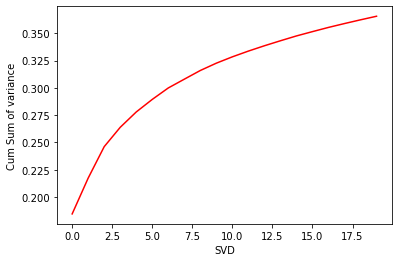

In [16]:
plt.plot(explained, color = 'red')
plt.xlabel("SVD")
plt.ylabel('Cum Sum of variance')
plt.show()

### Cosine Similarity

In [17]:
from sklearn.metrics.pairwise import cosine_similarity

latent_matrix_1_trimming = pd.DataFrame(latent_matrix, index = movies.movieId) # make sure that the data we are using is
latent_matrix_1_trimmed = latent_matrix_1_trimming.loc[movies_ratings.index]   # consistant with sample data in pivot table
latent_matrix_1_trimmed

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
movieId,,,,,,,,,,,,,,,,,,,
1,1.393244e-01,2.906857e-01,8.612721e-02,-1.008326e-02,-2.285145e-02,-1.857907e-01,3.457009e-01,3.396661e-02,-1.197399e-01,7.518206e-01,-7.768160e-03,-8.810722e-02,5.354134e-02,-3.590142e-01,5.502963e-02,3.837842e-02,9.271921e-02,-7.805993e-04,1.460684e-15
2,4.685632e-02,5.324076e-02,1.121998e-01,-9.804413e-03,4.991308e-02,-1.998167e-01,3.588394e-01,3.627658e-02,-1.483382e-01,7.484842e-01,-1.312339e-02,-3.482354e-02,-4.647791e-02,-2.144053e-01,-1.486301e-01,1.206831e-01,-3.753228e-01,4.948861e-04,-2.720494e-15
3,3.859120e-01,6.712204e-01,-1.200327e-01,-1.745001e-02,6.096254e-01,4.384344e-02,-6.847773e-02,-1.470962e-02,1.520552e-02,-5.179573e-02,-1.412194e-02,1.295844e-02,-4.927804e-02,-3.142474e-02,1.262593e-02,-2.220406e-02,6.277427e-04,2.421692e-04,1.395819e-15
4,7.294304e-01,4.312199e-01,-1.662500e-01,-8.410606e-03,4.919368e-01,5.423952e-02,-4.445743e-02,-1.387228e-02,1.603673e-02,-4.888815e-02,-2.981722e-02,1.279328e-02,-4.538437e-02,-2.859215e-02,1.188825e-02,-2.081374e-02,1.951793e-03,-1.014823e-03,1.069101e-15
5,3.615985e-01,8.920904e-01,-7.417663e-02,-7.798567e-03,-2.484890e-01,2.580067e-02,-2.707509e-02,-4.831928e-02,1.681859e-02,-3.053249e-02,1.099564e-02,1.274145e-02,-2.726934e-02,4.348408e-03,-7.694192e-03,-1.540300e-03,6.653207e-03,3.134129e-03,7.686001e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130073,2.409035e-01,-4.405294e-02,1.788008e-01,-2.014912e-02,1.332802e-02,-1.475946e-01,5.574217e-01,1.676159e-01,4.505352e-01,3.702934e-01,6.972607e-02,-8.655293e-02,-1.206723e-01,9.594208e-03,2.039479e-01,-1.420914e-01,-3.427494e-01,-1.343885e-03,-2.980830e-15
130219,4.249440e-01,-1.140133e-01,7.137570e-01,-1.048877e-01,-1.770619e-02,-4.038382e-01,-2.571595e-01,1.419424e-02,-7.301173e-02,-1.560579e-01,-9.563806e-02,-1.085366e-01,2.780987e-02,-6.281494e-02,-3.661863e-03,-1.298008e-03,-1.398684e-02,-2.570068e-02,3.405953e-16
130462,-5.016276e-18,1.532200e-16,-3.230438e-16,3.183525e-16,-1.373391e-16,-5.422125e-16,6.326521e-16,5.820762e-17,2.018359e-15,-6.986810e-16,9.014576e-16,1.684392e-15,2.298174e-16,2.655889e-15,-6.044990e-16,-1.088850e-15,-1.633857e-14,1.744946e-14,1.000000e+00


In [18]:
def recommend_similar_movies(title, method): # movie recommender code
    
    a_1 = np.array(latent_matrix_1_df.loc[title]).reshape(1, -1)
    a_2 = np.array(latent_matrix_2_df.loc[title]).reshape(1, -1)

    # calculate the similartity of this movie with the others in the list
    score_content = cosine_similarity(latent_matrix_1_df, a_1).reshape(-1)
    score_content_trim = cosine_similarity(latent_matrix_1_trimmed, a_1).reshape(-1)
    score_collab = cosine_similarity(latent_matrix_2_df, a_2).reshape(-1)

    # hybrid score: an average measure of both content and collaborative 
    hybrid_score = (score_content_trim + score_collab)/2
    
    if method == "hybrid":

        # form a data frame of similar movies 
        dictDF = {'hybrid': hybrid_score}
        similar_movies = pd.DataFrame(dictDF, index = latent_matrix_2_df.index)

        #sort it on the basis of hybrid score
        similar_movies.sort_values('hybrid', ascending = False, inplace = True)
        print(similar_movies)
    
    if method == "content":
        dictDF = {'content': score_content}
        similar_movies = pd.DataFrame(dictDF, index = latent_matrix_1_df.index)
        
        #sort it on the basis of content score
        similar_movies.sort_values('content', ascending = False, inplace = True)
        print(similar_movies)
    
    if method == "collab":
        dictDF = {'collab': score_collab}
        similar_movies = pd.DataFrame(dictDF, index = latent_matrix_2_df.index)
        
        #sort it on the basis of collab score
        similar_movies.sort_values('collab', ascending = False, inplace = True)
        print(similar_movies)
    
    return None

In [19]:
recommend_similar_movies("Toy Story (1995)", "hybrid") # top 5 movies are disney movies

                             hybrid
title                              
Toy Story (1995)           1.000000
Toy Story 2 (1999)         0.906911
Monsters, Inc. (2001)      0.863098
Antz (1998)                0.837565
Shrek (2001)               0.832482
...                             ...
Desert Saints (2002)      -0.055841
Havana (1990)             -0.060543
Carancho (2010)           -0.062310
Post Tenebras Lux (2012)  -0.062322
Quitting (Zuotian) (2001) -0.064919

[13950 rows x 1 columns]


In [20]:
recommend_similar_movies("Toy Story (1995)", "content") # top 5 are action/adventure movies, same genre

                                                     content
Adventures of Rocky and Bullwinkle, The (2000)      1.000000
Wild, The (2006)                                    1.000000
Toy Story Toons: Small Fry (2011)                   1.000000
Emperor's New Groove, The (2000)                    1.000000
DuckTales: The Movie - Treasure of the Lost Lam...  1.000000
...                                                      ...
Age of Dinosaurs (2013)                            -0.000515
Trancers II (1991)                                 -0.000515
Thunderbird Six (1968)                             -0.000515
Attack from Space (1965)                           -0.000515
Princess Blade, The (Shura Yukihime) (2001)        -0.000515

[27278 rows x 1 columns]


In [21]:
recommend_similar_movies("Toy Story (1995)", "collab") # people who watch toy story also watched these movies

                                              collab
title                                               
Toy Story (1995)                            1.000000
Willy Wonka & the Chocolate Factory (1971)  0.907666
Independence Day (a.k.a. ID4) (1996)        0.891789
Mission: Impossible (1996)                  0.859227
Star Wars: Episode IV - A New Hope (1977)   0.852329
...                                              ...
Desert Saints (2002)                       -0.111456
Havana (1990)                              -0.121090
Post Tenebras Lux (2012)                   -0.124647
Carancho (2010)                            -0.124647
Quitting (Zuotian) (2001)                  -0.129841

[13950 rows x 1 columns]


# Using Surprise (Python scikit for recommender systems)

In [22]:
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import train_test_split

In [23]:
# this will help us later on to id movie name with movie id

Mapping_file = dict(zip(movies["title"].tolist(), movies["movieId"].tolist()))

In [24]:
ratings 

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580
...,...,...,...,...
20000258,138493,68954,4.5,1258126920
20000259,138493,69526,4.5,1259865108
20000260,138493,69644,3.0,1260209457
20000261,138493,70286,5.0,1258126944


In [25]:
reader = Reader(rating_scale = (1,5))                                         # parse ratings
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader) # defining dataset

In [26]:
trainset, testset = train_test_split(data, test_size=0.25) # split data to train and test dataset

In [27]:
svd = SVD(verbose=True) # create svd model for matrix factorization

In [28]:
%%time
svd.fit(trainset) # train svd

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Wall time: 12min 31s


In [29]:
predictions = svd.test(testset) # get predictions of ratings in testset from svd

In [30]:
accuracy.rmse(predictions)

RMSE: 0.7895


0.7894894607909383

In [31]:
def pred_user_rating(ui):
    
    if ui in ratings.userId.unique():                                   # if userID is in our data
        ui_list = ratings[ratings.userId == ui].movieId.tolist()        # we get the movies the watched     
        d = {k: v for k,v in Mapping_file.items() if not v in ui_list}  # and save the movies they did not watch        
        
        predictedL = []                                                 # temp list for movie and predicted user rating
        for i, j in d.items():     
            predicted = svd.predict(ui, j)                              # predict rating user would give movie
            predictedL.append((i, predicted[3]))                        # save movie name and predicted rating
        pdf = pd.DataFrame(predictedL, columns = ['movies', 'ratings']) # create a new df for predictions
        pdf.sort_values('ratings', ascending=False, inplace=True)       # sort df
        pdf.set_index('movies', inplace=True)    
        return pdf.head(10)                                             # display top 10 movies the user didnt watch that we
                                                                        # think user would like the most   
    else:
        print("User Id does not exist in the list!")                    # incase the userID is not in our data
        return None

In [32]:
pred_user_rating(50)

,ratings
movies,
Withnail & I (1987),4.801777
Cosmos (1980),4.771925
Bill Hicks: Revelations (1993),4.701895
Prime Suspect (1991),4.699634
Beautiful Thing (1996),4.683839
Black Mirror (2011),4.683461
Bleak House (2005),4.670049
Stalker (1979),4.669782
Dr. Horrible's Sing-Along Blog (2008),4.668366


In [33]:
pred_user_rating(19)

,ratings
movies,
Gone with the Wind (1939),4.954735
Bill Hicks: Revelations (1993),4.853111
Intouchables (2011),4.787807
Life Is Beautiful (La Vita è bella) (1997),4.766617
Prime Suspect (1991),4.761780
North & South (2004),4.756240
Shadows of Our Forgotten Ancestors (Tini zabutykh predkiv) (1964),4.747995
Fires on the Plain (Nobi) (1959),4.736961
John Adams (2008),4.736239
